In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [ ]:
from google.colab import files
access_csv = files.upload()

Saving iris.csv to iris.csv


In [ ]:
df = pd.read_csv('iris.csv')
df.sample(3)

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
99,99,5.7,2.8,4.1,1.3,verginica
63,63,6.1,2.9,4.7,1.4,verginica
55,55,5.7,2.8,4.5,1.3,verginica


In [ ]:
le = LabelEncoder()

In [ ]:
df['species'] = le.fit_transform(df['species'])
df

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


In [ ]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
107,7.3,2.9,6.3,1.8,2


In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
X = df.drop(['species'], axis=1)
y = df['species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_test.shape

(30, 4)

In [ ]:
model = Sequential()

model.add(Dense(4, activation='relu', input_dim=4))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
callback = EarlyStopping(
    monitor = 'vall_loss',
    min_delta = 0.00001,
    patience = 5,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=callback)

Epoch 1/50
1/3 [=========>....................] - ETA: 2s - loss: 1.0799 - accuracy: 0.3438

3/3 [==============================] - 1s 176ms/step - loss: 1.0881 - accuracy: 0.3579 - val_loss: 1.1068 - val_accuracy: 0.2917
Epoch 2/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0732 - accuracy: 0.3750

3/3 [==============================] - 0s 26ms/step - loss: 1.0861 - accuracy: 0.3579 - val_loss: 1.1045 - val_accuracy: 0.2917
Epoch 3/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0628 - accuracy: 0.4062

3/3 [==============================] - 0s 33ms/step - loss: 1.0848 - accuracy: 0.3579 - val_loss: 1.1030 - val_accuracy: 0.2917
Epoch 4/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0848 - accuracy: 0.3438

3/3 [==============================] - 0s 31ms/step - loss: 1.0839 - accuracy: 0.3579 - val_loss: 1.1009 - val_accuracy: 0.2917
Epoch 5/50
1/3 [=========>....................] - ETA: 0s - loss: 1.1201 - accuracy: 0.2500

3/3 [==============================] - 0s 37ms/step - loss: 1.0831 - accuracy: 0.3579 - val_loss: 1.0993 - val_accuracy: 0.2917
Epoch 6/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0636 - accuracy: 0.3750

3/3 [==============================] - 0s 39ms/step - loss: 1.0819 - accuracy: 0.3579 - val_loss: 1.0987 - val_accuracy: 0.2917
Epoch 7/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0934 - accuracy: 0.3750

3/3 [==============================] - 0s 33ms/step - loss: 1.0812 - accuracy: 0.3579 - val_loss: 1.0981 - val_accuracy: 0.2917
Epoch 8/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0946 - accuracy: 0.3438

3/3 [==============================] - 0s 36ms/step - loss: 1.0804 - accuracy: 0.3474 - val_loss: 1.0979 - val_accuracy: 0.2917
Epoch 9/50
1/3 [=========>....................] - ETA: 0s - loss: 1.1086 - accuracy: 0.2188

3/3 [==============================] - 0s 35ms/step - loss: 1.0802 - accuracy: 0.3368 - val_loss: 1.0976 - val_accuracy: 0.2917
Epoch 10/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0799 - accuracy: 0.2812

3/3 [==============================] - 0s 32ms/step - loss: 1.0793 - accuracy: 0.3368 - val_loss: 1.0978 - val_accuracy: 0.2917
Epoch 11/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0884 - accuracy: 0.3125

3/3 [==============================] - 0s 37ms/step - loss: 1.0786 - accuracy: 0.3368 - val_loss: 1.0980 - val_accuracy: 0.2917
Epoch 12/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0990 - accuracy: 0.2812

3/3 [==============================] - 0s 39ms/step - loss: 1.0780 - accuracy: 0.3579 - val_loss: 1.0983 - val_accuracy: 0.2917
Epoch 13/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0616 - accuracy: 0.3750

3/3 [==============================] - 0s 35ms/step - loss: 1.0774 - accuracy: 0.3684 - val_loss: 1.0989 - val_accuracy: 0.2917
Epoch 14/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0874 - accuracy: 0.2812

3/3 [==============================] - 0s 31ms/step - loss: 1.0768 - accuracy: 0.3684 - val_loss: 1.0993 - val_accuracy: 0.2917
Epoch 15/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0837 - accuracy: 0.3125

3/3 [==============================] - 0s 28ms/step - loss: 1.0760 - accuracy: 0.3895 - val_loss: 1.0996 - val_accuracy: 0.2917
Epoch 16/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0618 - accuracy: 0.4062

3/3 [==============================] - 0s 34ms/step - loss: 1.0754 - accuracy: 0.3895 - val_loss: 1.1001 - val_accuracy: 0.3333
Epoch 17/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0342 - accuracy: 0.5000

3/3 [==============================] - 0s 35ms/step - loss: 1.0750 - accuracy: 0.3895 - val_loss: 1.1010 - val_accuracy: 0.3333
Epoch 18/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0572 - accuracy: 0.4062

3/3 [==============================] - 0s 38ms/step - loss: 1.0740 - accuracy: 0.4000 - val_loss: 1.1015 - val_accuracy: 0.3333
Epoch 19/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0664 - accuracy: 0.4062

3/3 [==============================] - 0s 35ms/step - loss: 1.0733 - accuracy: 0.4000 - val_loss: 1.1019 - val_accuracy: 0.3333
Epoch 20/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0585 - accuracy: 0.3125

3/3 [==============================] - 0s 26ms/step - loss: 1.0724 - accuracy: 0.4000 - val_loss: 1.1016 - val_accuracy: 0.3333
Epoch 21/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0783 - accuracy: 0.4375

3/3 [==============================] - 0s 18ms/step - loss: 1.0716 - accuracy: 0.4421 - val_loss: 1.1013 - val_accuracy: 0.3333
Epoch 22/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0660 - accuracy: 0.4062

3/3 [==============================] - 0s 19ms/step - loss: 1.0707 - accuracy: 0.4421 - val_loss: 1.1014 - val_accuracy: 0.3333
Epoch 23/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0385 - accuracy: 0.5312

3/3 [==============================] - 0s 19ms/step - loss: 1.0701 - accuracy: 0.4421 - val_loss: 1.1007 - val_accuracy: 0.3333
Epoch 24/50
1/3 [=========>....................] - ETA: 0s - loss: 1.1012 - accuracy: 0.3125

3/3 [==============================] - 0s 18ms/step - loss: 1.0689 - accuracy: 0.4421 - val_loss: 1.1005 - val_accuracy: 0.3333
Epoch 25/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0779 - accuracy: 0.4062

3/3 [==============================] - 0s 18ms/step - loss: 1.0682 - accuracy: 0.4421 - val_loss: 1.1010 - val_accuracy: 0.3333
Epoch 26/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0531 - accuracy: 0.4688

3/3 [==============================] - 0s 19ms/step - loss: 1.0672 - accuracy: 0.4421 - val_loss: 1.1011 - val_accuracy: 0.3333
Epoch 27/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0565 - accuracy: 0.4688

3/3 [==============================] - 0s 17ms/step - loss: 1.0661 - accuracy: 0.4421 - val_loss: 1.1012 - val_accuracy: 0.3333
Epoch 28/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0422 - accuracy: 0.5000

3/3 [==============================] - 0s 18ms/step - loss: 1.0653 - accuracy: 0.4421 - val_loss: 1.1017 - val_accuracy: 0.3750
Epoch 29/50
1/3 [=========>....................] - ETA: 0s - loss: 1.1077 - accuracy: 0.3125

3/3 [==============================] - 0s 28ms/step - loss: 1.0640 - accuracy: 0.4632 - val_loss: 1.1007 - val_accuracy: 0.3750
Epoch 30/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0492 - accuracy: 0.4688

3/3 [==============================] - 0s 19ms/step - loss: 1.0628 - accuracy: 0.4632 - val_loss: 1.1003 - val_accuracy: 0.3750
Epoch 31/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0478 - accuracy: 0.5312

3/3 [==============================] - 0s 18ms/step - loss: 1.0618 - accuracy: 0.4632 - val_loss: 1.1006 - val_accuracy: 0.3750
Epoch 32/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0612 - accuracy: 0.4375

3/3 [==============================] - 0s 19ms/step - loss: 1.0604 - accuracy: 0.4737 - val_loss: 1.1000 - val_accuracy: 0.3750
Epoch 33/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0213 - accuracy: 0.6562

3/3 [==============================] - 0s 19ms/step - loss: 1.0593 - accuracy: 0.4842 - val_loss: 1.0998 - val_accuracy: 0.3750
Epoch 34/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0549 - accuracy: 0.4688

3/3 [==============================] - 0s 17ms/step - loss: 1.0578 - accuracy: 0.4842 - val_loss: 1.0993 - val_accuracy: 0.3750
Epoch 35/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0527 - accuracy: 0.4688

3/3 [==============================] - 0s 21ms/step - loss: 1.0564 - accuracy: 0.4947 - val_loss: 1.0985 - val_accuracy: 0.3750
Epoch 36/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0538 - accuracy: 0.5000

3/3 [==============================] - 0s 28ms/step - loss: 1.0552 - accuracy: 0.5158 - val_loss: 1.0974 - val_accuracy: 0.3750
Epoch 37/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0994 - accuracy: 0.4688

3/3 [==============================] - 0s 19ms/step - loss: 1.0538 - accuracy: 0.5263 - val_loss: 1.0963 - val_accuracy: 0.3750
Epoch 38/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0169 - accuracy: 0.5938

3/3 [==============================] - 0s 18ms/step - loss: 1.0524 - accuracy: 0.5263 - val_loss: 1.0964 - val_accuracy: 0.3750
Epoch 39/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0590 - accuracy: 0.5938

3/3 [==============================] - 0s 22ms/step - loss: 1.0506 - accuracy: 0.5263 - val_loss: 1.0958 - val_accuracy: 0.3750
Epoch 40/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0476 - accuracy: 0.5000

3/3 [==============================] - 0s 18ms/step - loss: 1.0491 - accuracy: 0.5263 - val_loss: 1.0955 - val_accuracy: 0.3750
Epoch 41/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0824 - accuracy: 0.4375

3/3 [==============================] - 0s 18ms/step - loss: 1.0476 - accuracy: 0.5368 - val_loss: 1.0946 - val_accuracy: 0.3750
Epoch 42/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0628 - accuracy: 0.5312

3/3 [==============================] - 0s 18ms/step - loss: 1.0458 - accuracy: 0.5684 - val_loss: 1.0936 - val_accuracy: 0.3750
Epoch 43/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0400 - accuracy: 0.6250

3/3 [==============================] - 0s 18ms/step - loss: 1.0442 - accuracy: 0.5789 - val_loss: 1.0927 - val_accuracy: 0.3750
Epoch 44/50
1/3 [=========>....................] - ETA: 0s - loss: 0.9893 - accuracy: 0.6250

3/3 [==============================] - 0s 23ms/step - loss: 1.0427 - accuracy: 0.5789 - val_loss: 1.0923 - val_accuracy: 0.3750
Epoch 45/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0458 - accuracy: 0.5312

3/3 [==============================] - 0s 18ms/step - loss: 1.0405 - accuracy: 0.5789 - val_loss: 1.0908 - val_accuracy: 0.3750
Epoch 46/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0223 - accuracy: 0.6250

3/3 [==============================] - 0s 17ms/step - loss: 1.0387 - accuracy: 0.5789 - val_loss: 1.0896 - val_accuracy: 0.3750
Epoch 47/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0151 - accuracy: 0.6250

3/3 [==============================] - 0s 20ms/step - loss: 1.0367 - accuracy: 0.6105 - val_loss: 1.0880 - val_accuracy: 0.3750
Epoch 48/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0268 - accuracy: 0.6250

3/3 [==============================] - 0s 17ms/step - loss: 1.0348 - accuracy: 0.6105 - val_loss: 1.0859 - val_accuracy: 0.4167
Epoch 49/50
1/3 [=========>....................] - ETA: 0s - loss: 0.9860 - accuracy: 0.7188

3/3 [==============================] - 0s 18ms/step - loss: 1.0327 - accuracy: 0.6316 - val_loss: 1.0847 - val_accuracy: 0.4167
Epoch 50/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0519 - accuracy: 0.5312

3/3 [==============================] - 0s 18ms/step - loss: 1.0305 - accuracy: 0.6316 - val_loss: 1.0830 - val_accuracy: 0.4167


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test_Accuracy: {accuracy}')

1/1 [==============================] - 0s 52ms/step - loss: 1.0526 - accuracy: 0.4000
Test_Accuracy: 0.4000000059604645


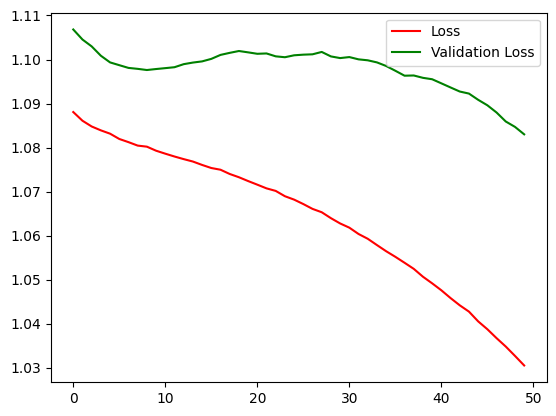

In [ ]:
plt.plot(history.history['loss'], label='Loss', color='r')
plt.plot(history.history['val_loss'], label='Validation Loss', color='g')
plt.legend()

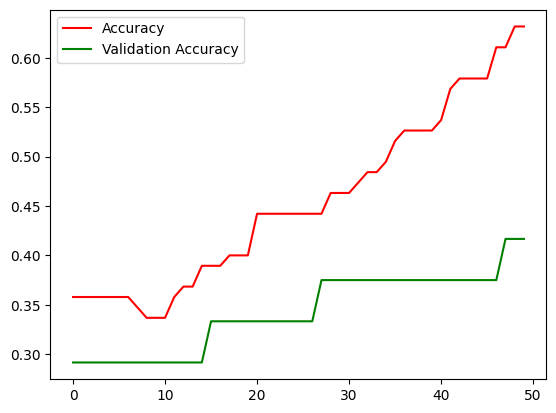

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy', color='r')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='g')
plt.legend()